In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

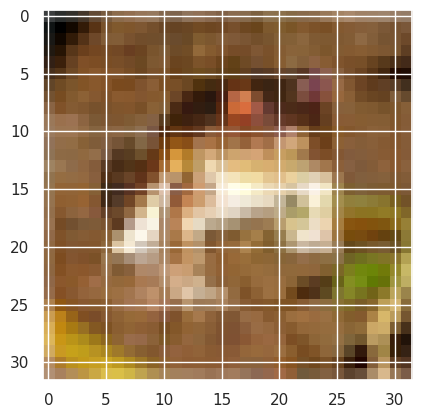

In [ ]:
sns.set()
plt.imshow(x_train[0])

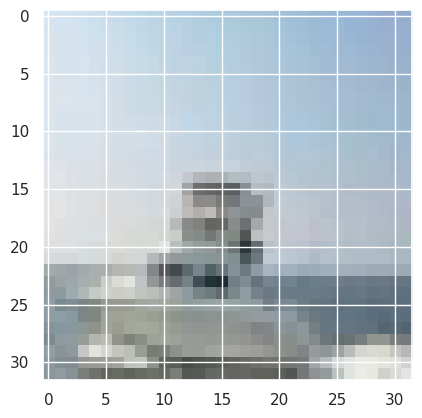

In [ ]:
plt.imshow(x_train[100])

In [ ]:
image=x_train[100]

In [ ]:
image[:,:,0]

array([[213, 211, 211, ..., 151, 151, 149],
       [214, 212, 212, ..., 152, 152, 151],
       [216, 214, 213, ..., 153, 153, 151],
       ...,
       [145, 136, 143, ..., 216, 196, 183],
       [139, 129, 129, ..., 227, 223, 209],
       [137, 143, 136, ..., 209, 217, 228]], dtype=uint8)

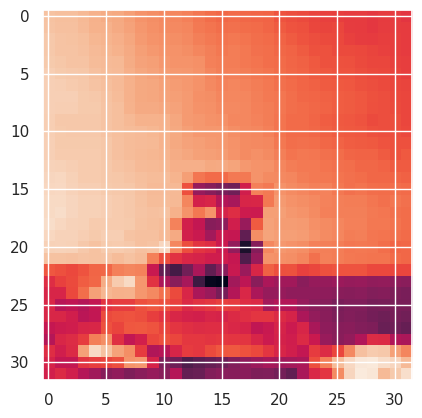

In [ ]:
plt.imshow(image[:,:,0])

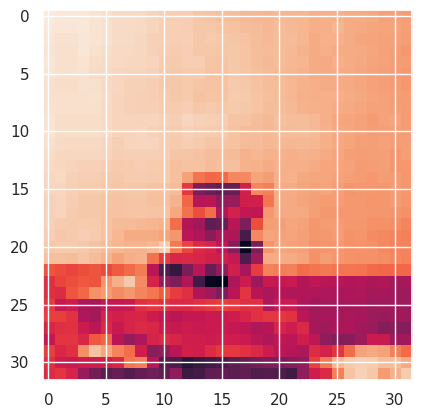

In [ ]:
plt.imshow(image[:,:,2])

In [ ]:
image[:,:,2]

array([[242, 240, 240, ..., 206, 206, 204],
       [241, 239, 239, ..., 207, 207, 205],
       [239, 237, 237, ..., 206, 206, 204],
       ...,
       [165, 154, 158, ..., 206, 191, 182],
       [159, 148, 145, ..., 219, 219, 209],
       [157, 161, 152, ..., 203, 213, 226]], dtype=uint8)

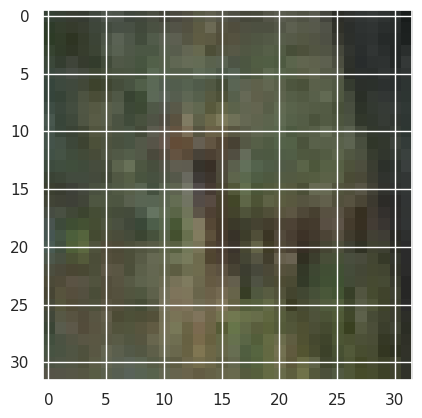

In [ ]:
plt.imshow(x_train[10])

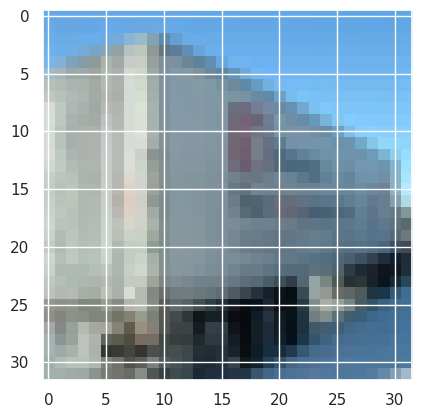

In [ ]:
plt.imshow(x_train[15])

In [ ]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train[0][:,:,0]

array([[0.23137255, 0.16862745, 0.19607843, ..., 0.61960784, 0.59607843,
        0.58039216],
       [0.0627451 , 0.        , 0.07058824, ..., 0.48235294, 0.46666667,
        0.47843137],
       [0.09803922, 0.0627451 , 0.19215686, ..., 0.4627451 , 0.47058824,
        0.42745098],
       ...,
       [0.81568627, 0.78823529, 0.77647059, ..., 0.62745098, 0.21960784,
        0.20784314],
       [0.70588235, 0.67843137, 0.72941176, ..., 0.72156863, 0.38039216,
        0.3254902 ],
       [0.69411765, 0.65882353, 0.70196078, ..., 0.84705882, 0.59215686,
        0.48235294]])

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_cat_train=to_categorical(y_train,10)
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_cat_test=to_categorical(y_test,10)

#Model 1

In [ ]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten, Dropout, BatchNormalization

from tensorflow.keras.optimizers import SGD

from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early=EarlyStopping(monitor='val_loss',patience=3)

In [ ]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(2500,activation='relu'))

model.add(Dense(10,activation='softmax'))




In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 2500)             

In [ ]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test))

Epoch 1/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1543 - accuracy: 0.5947 - val_loss: 1.1804 - val_accuracy: 0.5894
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0874 - accuracy: 0.6207 - val_loss: 1.1551 - val_accuracy: 0.5947
Epoch 3/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0256 - accuracy: 0.6452 - val_loss: 1.1044 - val_accuracy: 0.6116
Epoch 4/15
1563/1563 [==============================] - 9s 5ms/step - loss: 0.9646 - accuracy: 0.6678 - val_loss: 1.1060 - val_accuracy: 0.6127
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9083 - accuracy: 0.6850 - val_loss: 1.1422 - val_accuracy: 0.6068
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8521 - accuracy: 0.7042 - val_loss: 1.0320 - val_accuracy: 0.6500
Epoch 7/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7959 - accuracy: 0.7255 - val_loss: 1.0000 - val_accuracy

#Model 2

In [ ]:
model2=Sequential()

#Feature extraction layers

model2.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))


model2.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))


model2.add(BatchNormalization())


model2.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))


model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size=(2,2)))


model2.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))

model2.add(BatchNormalization())


model2.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model2.add(BatchNormalization())

model2.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size=(2,2)))


model2.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))

model2.add(BatchNormalization())

model2.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))

model2.add(BatchNormalization())

model2.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model2.add(BatchNormalization())


model2.add(Flatten())

#Classifier


#model2.add(Dense(4000,activation='relu'))
#model2.add(BatchNormalization())

#model2.add(Dropout(0.5))

#model2.add(Dense(1000,activation='relu'))
#model2.add(BatchNormalization())

#model2.add(Dropout(0.5))

model2.add(Dense(500,activation='relu'))
model2.add(BatchNormalization())

model2.add(Dropout(0.5))

model2.add(Dense(200,activation='relu'))
model2.add(BatchNormalization())

model2.add(Dropout(0.5))

model2.add(Dense(100,activation='relu'))
model2.add(BatchNormalization())

model2.add(Dropout(0.5))

model2.add(Dense(10,activation='softmax'))


#opt=SGD(learning_rate=0.001,momentum=0.9)


model2.compile(optimizer='Adamax',loss='categorical_crossentropy',metrics=['accuracy'])




In [ ]:
model2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_62 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_63 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_13 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 conv2d_64 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_14 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 16, 16, 64)      

In [ ]:
model2.fit(x_train,y_cat_train,epochs=50,validation_data=(x_test,y_cat_test))

Epoch 1/50
1563/1563 [==============================] - 131s 15ms/step - loss: 2.0596 - accuracy: 0.3234 - val_loss: 1.4149 - val_accuracy: 0.4990
Epoch 2/50
1563/1563 [==============================] - 22s 14ms/step - loss: 1.3387 - accuracy: 0.5258 - val_loss: 1.0486 - val_accuracy: 0.6310
Epoch 3/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0096 - accuracy: 0.6577 - val_loss: 0.8199 - val_accuracy: 0.7167
Epoch 4/50
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8121 - accuracy: 0.7305 - val_loss: 0.6937 - val_accuracy: 0.7623
Epoch 5/50
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6523 - accuracy: 0.7876 - val_loss: 0.6037 - val_accuracy: 0.7970
Epoch 6/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.5378 - accuracy: 0.8278 - val_loss: 0.5385 - val_accuracy: 0.8209
Epoch 7/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.4223 - accuracy: 0.8666 - val_loss: 0.5311 

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predictions=np.argmax(model2.predict(x_test),1)

313/313 [==============================] - 2s 3ms/step


In [ ]:
predictions

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1000
           1       0.94      0.93      0.93      1000
           2       0.80      0.80      0.80      1000
           3       0.71      0.75      0.73      1000
           4       0.84      0.85      0.84      1000
           5       0.82      0.78      0.80      1000
           6       0.90      0.89      0.90      1000
           7       0.92      0.88      0.90      1000
           8       0.91      0.93      0.92      1000
           9       0.92      0.92      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [ ]:
confusion_matrix(y_test,predictions)

array([[900,   9,  18,  14,   8,   1,   4,   4,  27,  15],
       [ 10, 926,   0,   4,   2,   2,   2,   0,  13,  41],
       [ 41,   2, 795,  42,  47,  28,  24,  11,   6,   4],
       [ 19,   2,  48, 753,  29,  90,  30,  11,  15,   3],
       [ 10,   1,  44,  38, 846,  16,  16,  25,   4,   0],
       [  5,   1,  29, 120,  30, 782,   7,  19,   4,   3],
       [  8,   1,  30,  45,  11,   4, 893,   2,   6,   0],
       [  7,   0,  18,  25,  36,  24,   4, 878,   5,   3],
       [ 32,   5,   3,   7,   0,   2,   4,   0, 931,  16],
       [ 17,  34,   4,   8,   2,   0,   3,   1,  10, 921]])

In [ ]:
y_test[0]

array([3], dtype=uint8)

In [ ]:
x_test[0].shape

(32, 32, 3)

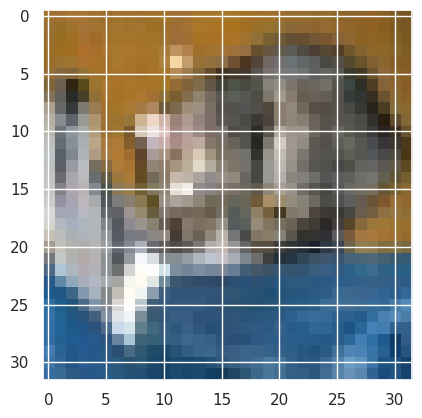

In [ ]:
plt.imshow(x_test[0])

In [ ]:
y_test[0]

array([3], dtype=uint8)

In [ ]:
np.argmax(model2.predict(x_test[0].reshape(1,32,32,3),1))

1/1 [==============================] - 0s 25ms/step


3

In [ ]:
y_test[100]

array([4], dtype=uint8)

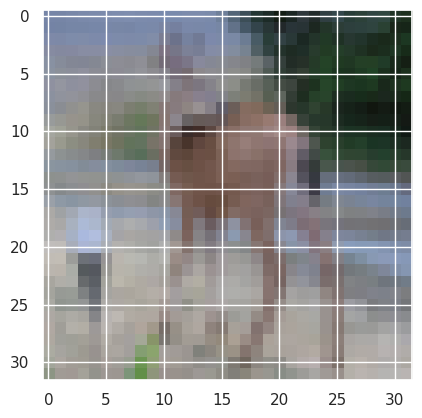

In [ ]:
plt.imshow(x_test[100])

In [ ]:
np.argmax(model2.predict(x_test[100].reshape(1,32,32,3),1))

1/1 [==============================] - 0s 33ms/step


4

In [ ]:
10000*0.86

8600.0

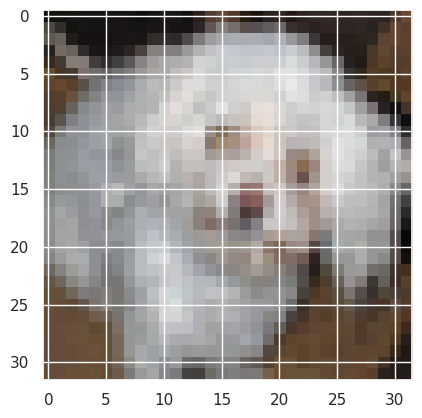

In [ ]:
plt.imshow(x_test[1000])

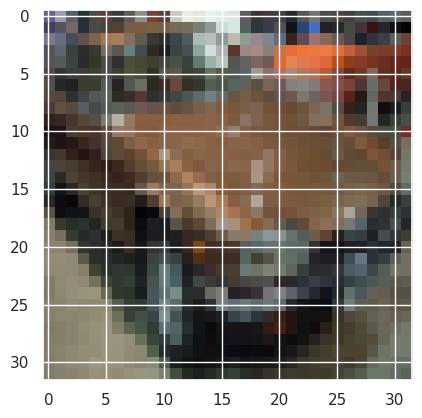

In [ ]:
plt.imshow(x_test[2000])

In [ ]:
np.argmax(model2.predict(x_test[1999].reshape(1,32,32,3),1))

1/1 [==============================] - 0s 21ms/step


5

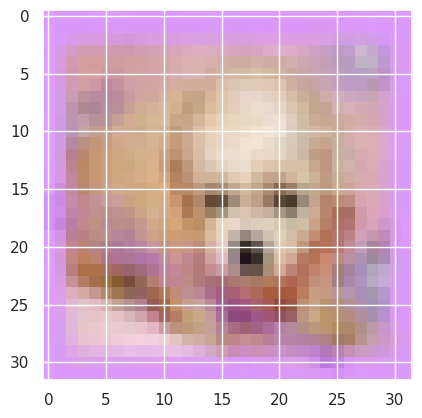

In [ ]:
plt.imshow(x_test[1999])